Modified from https://github.com/tiagoantao/bioinf-python/blob/master/notebooks/R_magic.ipynb

## The cell below will get the data file, you only need to run it once 

(you do not need to do this if you have done it in the Interfacing_R notebook)

!rm sequence.index 2>/dev/null
!wget ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/sequence.index

##### 1. The first thing you need to do is load R magics and ggplot2:

In [1]:
import rpy2.robjects as robjects
import rpy2.robjects.lib.ggplot2 as ggplot2

%load_ext rpy2.ipython

##### 2. Let's read the sequence.index file that was downloaded in the previous recipe:
%%: IPython cell interprets as R code

In [2]:
%%R
seq.data <- read.delim('sequence.index', header=TRUE, stringsAsFactors=FALSE)
seq.data$READ_COUNT <- as.integer(seq.data$READ_COUNT)
seq.data$BASE_COUNT <- as.integer(seq.data$BASE_COUNT)

##### 3. We can now transfer a variable to the Python namespace (where we could have done Python-based operations):

In [3]:
seq_data = %R seq.data

#seq_data = %R read.delim('sequence.index', header=TRUE, stringsAsFactors=FALSE)

as_integer = robjects.r('as.integer')

match = robjects.r.match

my_col = match('READ_COUNT', seq_data.colnames)[0] # Vector returned

seq_data[my_col - 1] = as_integer(seq_data[my_col - 1])

my_col = match('BASE_COUNT', seq_data.colnames)[0] # Vector returned

seq_data[my_col - 1] = as_integer(seq_data[my_col - 1])

##### 4. Let's put this data frame back in the R namespace, as follows:

In [4]:
%R -i seq_data #-i : informs the magic system that the variable that follows on the Python space is to be copied in the R namespace.
%R print(colnames(seq_data)) #The data frame is available in R => object back into R.

 [1] "FASTQ_FILE"          "MD5"                 "RUN_ID"             
 [4] "STUDY_ID"            "STUDY_NAME"          "CENTER_NAME"        
 [7] "SUBMISSION_ID"       "SUBMISSION_DATE"     "SAMPLE_ID"          
[10] "SAMPLE_NAME"         "POPULATION"          "EXPERIMENT_ID"      
[13] "INSTRUMENT_PLATFORM" "INSTRUMENT_MODEL"    "LIBRARY_NAME"       
[16] "RUN_NAME"            "RUN_BLOCK_NAME"      "INSERT_SIZE"        
[19] "LIBRARY_LAYOUT"      "PAIRED_FASTQ"        "WITHDRAWN"          
[22] "WITHDRAWN_DATE"      "COMMENT"             "READ_COUNT"         
[25] "BASE_COUNT"          "ANALYSIS_GROUP"     


In [5]:
%R seq_data$CENTER_NAME <- toupper(seq_data$CENTER_NAME)

array(['BGI', 'BGI', 'BGI', ..., 'BI', 'BI', 'BI'], 
      dtype='|S8')

In [6]:
%%R
seq_data <- seq_data[seq_data$WITHDRAWN==0, ]
seq_data <- seq_data[, c('STUDY_ID', 'STUDY_NAME', 'CENTER_NAME', 'SAMPLE_ID', 'SAMPLE_NAME', 'POPULATION', 'INSTRUMENT_PLATFORM', 'LIBRARY_LAYOUT', 'PAIRED_FASTQ', 'READ_COUNT', 'BASE_COUNT', 'ANALYSIS_GROUP')]

##### 5. The R magic system also allows you to reduce code as it changes the behavior of the interaction of R with IPython.

No need to use the .png and dev.off R functions

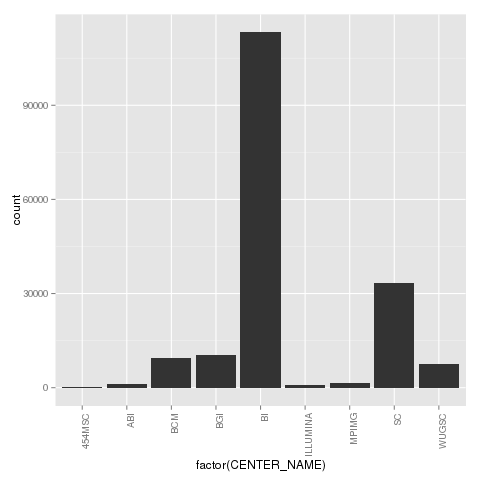

In [7]:
%%R
bar <- ggplot(seq_data) +  aes(factor(CENTER_NAME)) + geom_bar() + theme(axis.text.x = element_text(angle = 90, hjust = 1))
print(bar)

In [8]:
%%R
seq_data$POPULATION <- as.factor(seq_data$POPULATION)
yri_ceu <- seq_data[seq_data$POPULATION %in% c("YRI", "CEU") & seq_data$BASE_COUNT < 2E9 & seq_data$READ_COUNT < 3E7, ]

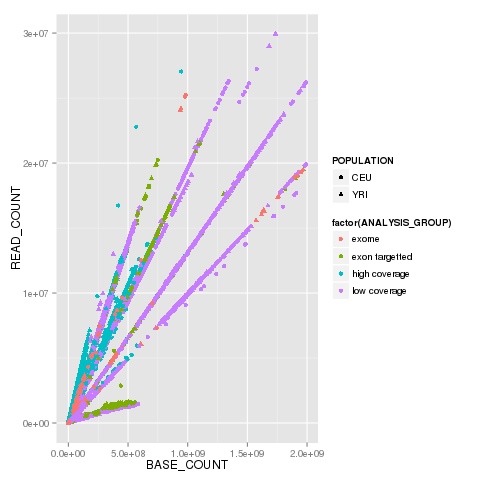

In [9]:
%%R
scatter <- ggplot(yri_ceu, aes(x=BASE_COUNT, y=READ_COUNT, col=factor(ANALYSIS_GROUP), shape=POPULATION)) + geom_point()
print(scatter)

In [10]:
%R ggsave('scatterplot.png', scatter, dpi=600)

/home/deepbio/anaconda/envs/bioinformatics/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Saving 6.67 x 6.67 in image

  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [11]:
%%R
library(gridExtra)
g <- arrangeGrob(bar, scatter, ncol=1)
g

TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (2-2,1-1) arrange gtable[layout]


In [12]:
%R ggsave('fig.png', g, dpi=600)


Error in ggsave("fig.png", g, dpi = 600) : plot should be a ggplot2 plot


/home/deepbio/anaconda/envs/bioinformatics/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in ggsave("fig.png", g, dpi = 600) : plot should be a ggplot2 plot

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/home/deepbio/anaconda/envs/bioinformatics/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 추가정보: 
  res = super(Function, self).__call__(*new_args, **new_kwargs)
/home/deepbio/anaconda/envs/bioinformatics/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 경고메시지(들): 

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/home/deepbio/anaconda/envs/bioinformatics/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 1: 
  res = super(Function, self).__call__(*new_args, **new_kwargs)
/home/deepbio/anaconda/envs/bioinformatics/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: In withVisible({ :
  res = super(Function, self).__call__(*new_args

** See also **

- Basic instructions on IPython magics at http://nbviewer.
ipython.org/github/ipython/ipython/blob/1.x/examples/notebooks/Cell%20Magics.ipynb
- Default extensions at http://ipython.org/ipython-doc/dev/config/extensions/
- Third-party magic extensions at https://github.com/ipython/ipython/wiki/Extensions-Index